## Objective:
We have a sample time series data of natural gas prices. Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024. Lets analyze the data and see if we can extrapolate it for one year into the future. 

In [25]:
#import basic libraries. We will import more as and when required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
# read-in raw data
gas = pd.read_csv('nat_gas.csv',parse_dates=['Dates'])
gas.head(15)

C:\Users\akarte\AppData\Local\Temp\ipykernel_22476\1064809236.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gas = pd.read_csv('nat_gas.csv',parse_dates=['Dates'])


,Dates,Prices
0,2020-10-31,10.10
1,2020-11-30,10.30
2,2020-12-31,11.00
3,2021-01-31,10.90
4,2021-02-28,10.90
5,2021-03-31,10.90
6,2021-04-30,10.40
7,2021-05-31,9.84
8,2021-06-30,10.00
9,2021-07-31,10.10


Reading the raw data doesn't help much. Do we gain any new information if we plot our data?

<Axes: xlabel='Dates'>

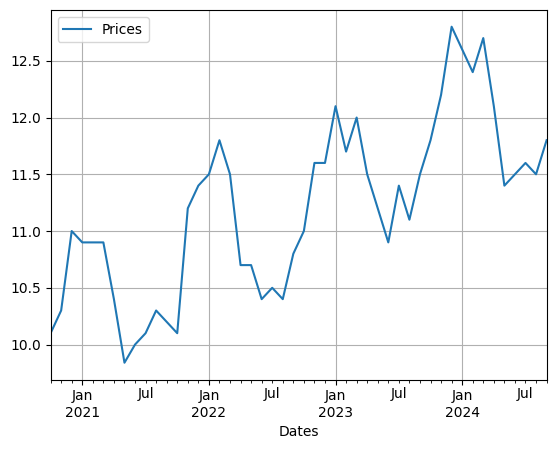

In [27]:
gas.plot(x = 'Dates', y = 'Prices' , grid= True)

We can observe that there is some pattern in the data. 
  1. Overall the prices have been increasing. 
  2. The prices drop after Jan and start rising again after mid year. It looks like a yearly cycle. 


## Seasonality and Trends

**Trends:** long-term upward or downward movement in the data, indicating a general increase or decrease over time. Could be additive or multiplicate w.r.t time.

**Seasonality:** repeating pattern in the data that occurs at regular intervals, such as daily, weekly, monthly, or yearly. Could be additive or multiplicate w.r.t time.

A time series can be a combination of any trend and seasonality or no trends/seasonality. Below graph showcases all such possible combinations.

The additive model is Y[t] = T[t] + S[t] + e[t]

The multiplicative model is Y[t] = T[t] * S[t] * e[t]

![](./3.png "Source: Galit Shmueli on YouTube")

                                                                        (Source: Galit Shmueli on YouTube)

In [28]:
# time series - statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### How to identify seasonality and trends?
- Compute the trend component, T, using a moving/rolling average.

- De-trend the series, Y-T for additive model and Y/T for multiplicative model.

- Compute the seasonal component, S, by taking the average of the de-trended series for each season.

- The residual component, R, is calculated as: R = Y-T-R for additive model and R = Y/(TR) for multiplicative model.

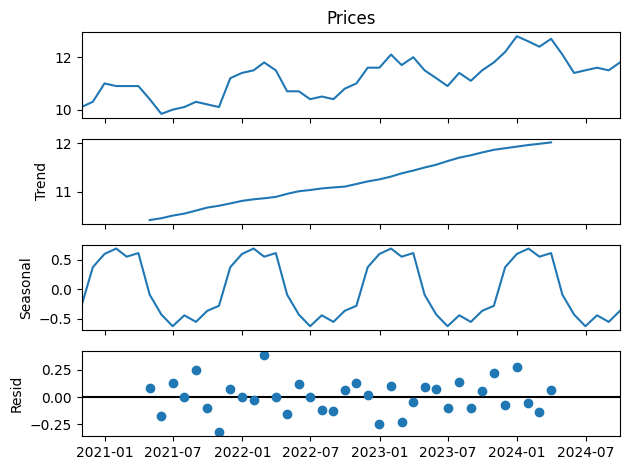

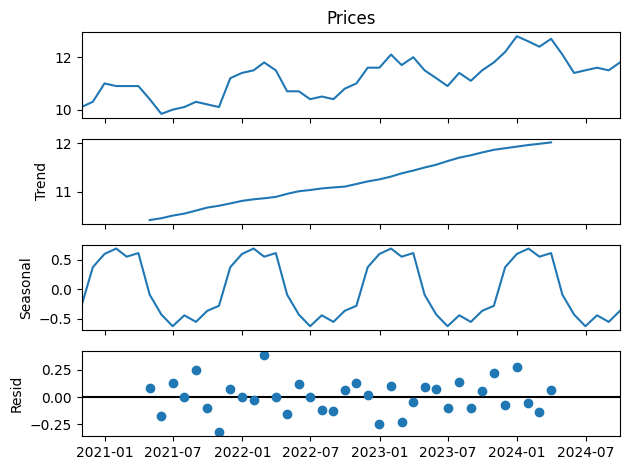

In [29]:
gas = gas.set_index('Dates')
decomposed = seasonal_decompose(gas['Prices'],model='additive')
decomposed.plot()
#sometimes this outputs the results twice. Kindly ignore the second image as it is identical to the first image

From this graph we can see each element of time series individually. Our observations were correct, the values are increasing overll i.e the trend. And there is some cyclic nature to the data which is captured by Seasonal part

## Simple Exponential Smoothing
The simple exponential smoothing method does not take into account any trend or seasonality.

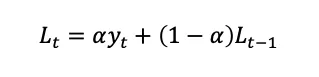

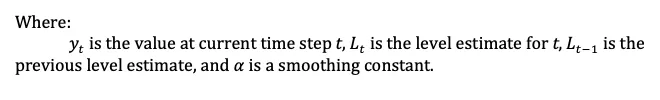

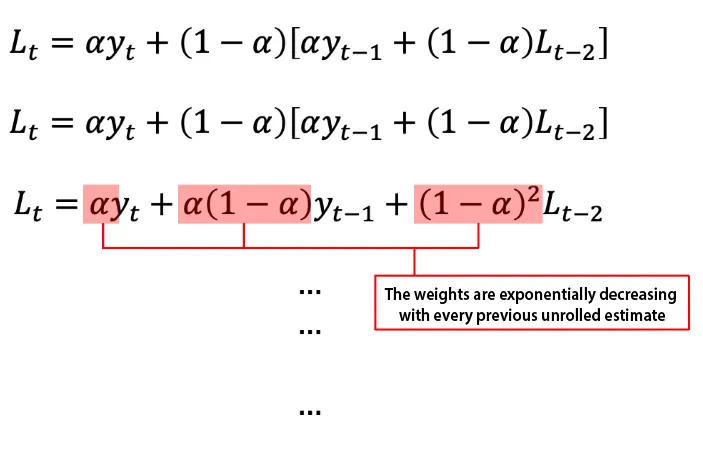

In [30]:
m = 12
alpha = 1/(2*m)

c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Single Exponential Smoothing'}, xlabel='Dates'>

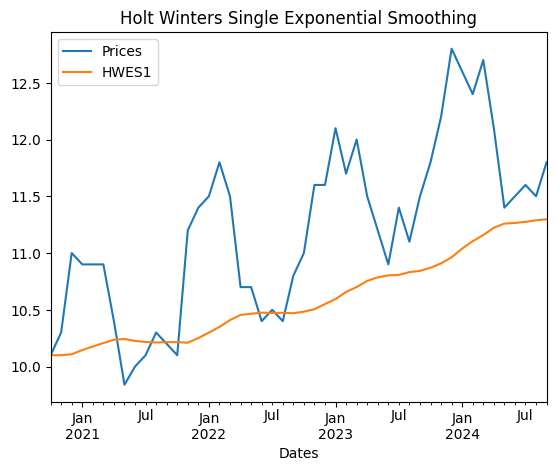

In [31]:
gas['HWES1'] = SimpleExpSmoothing(gas['Prices']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
gas[['Prices','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

# HOLT’S EXPONENTIAL SMOOTHING

Holt’s exponential smoothing method is capable of taking into account a trend component. Holt’s method extends simple exponential smoothing by assuming that the time series has both a level and a trend. 

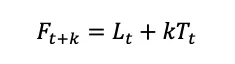

for multiplicative it will be F = L * T ^ k 

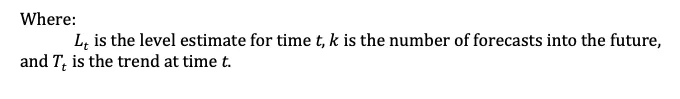

c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Dates'>

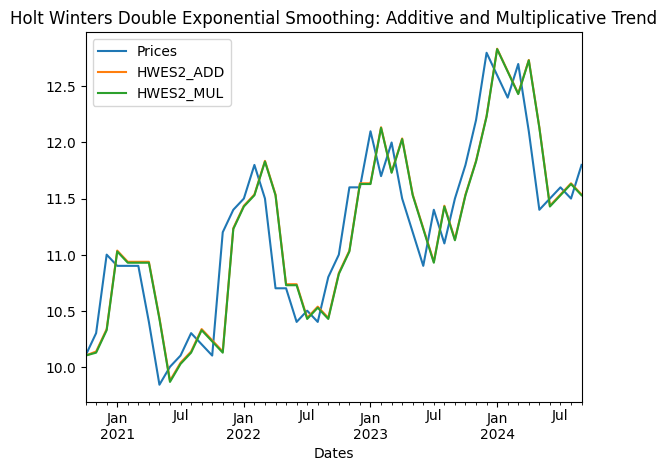

In [32]:
gas['HWES2_ADD'] = ExponentialSmoothing(gas['Prices'],trend='add').fit().fittedvalues
gas['HWES2_MUL'] = ExponentialSmoothing(gas['Prices'],trend='mul').fit().fittedvalues
gas[['Prices','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Dates'>

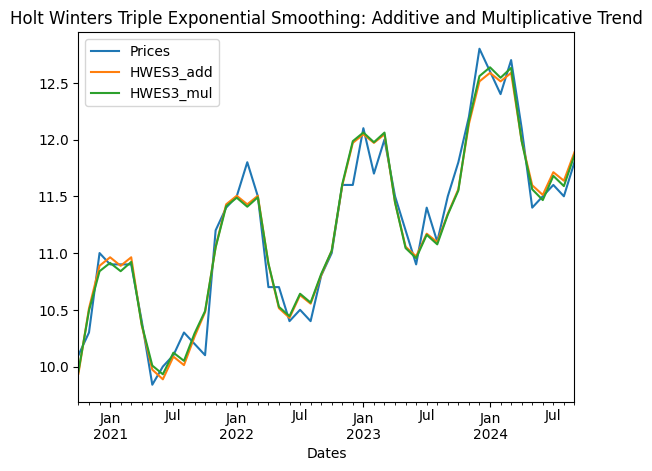

In [33]:
gas['HWES3_add'] = ExponentialSmoothing(gas['Prices'], trend='add', seasonal='add',seasonal_periods=12).fit().fittedvalues
gas['HWES3_mul'] = ExponentialSmoothing(gas['Prices'], trend='add', seasonal='mul').fit().fittedvalues
gas[['Prices','HWES3_add','HWES3_mul']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Trend')


# WINTERS’ EXPONENTIAL SMOOTHIN

Winter’s method assumes that the time series has a level, trend and seasonal component. A forecast with Winter’s exponential smoothing can be expressed as:

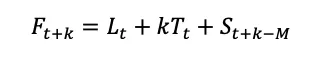

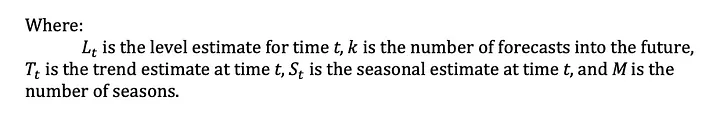



Split data into train - test

In [34]:
#gas = pd.read_csv('nat_gas.csv',parse_dates=['Dates'])
gas_train = gas[:36]
gas_test = gas[36:]

c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Dates'>

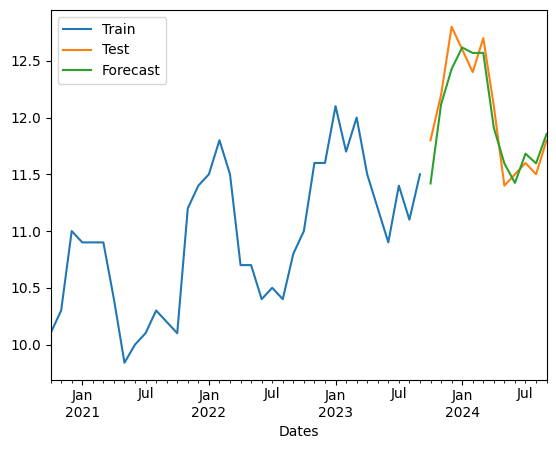

In [35]:
model = ExponentialSmoothing(gas_train['Prices'] , trend='add' , seasonal='mul').fit()
forecast = model.forecast(12)
gas_train['Prices'].plot(legend = True, label = 'Train')
gas_test['Prices'].plot(legend = True, label = 'Test')
forecast.plot(legend = True, label = 'Forecast')

Zoom in on the test data predictions

<Axes: xlabel='Dates'>

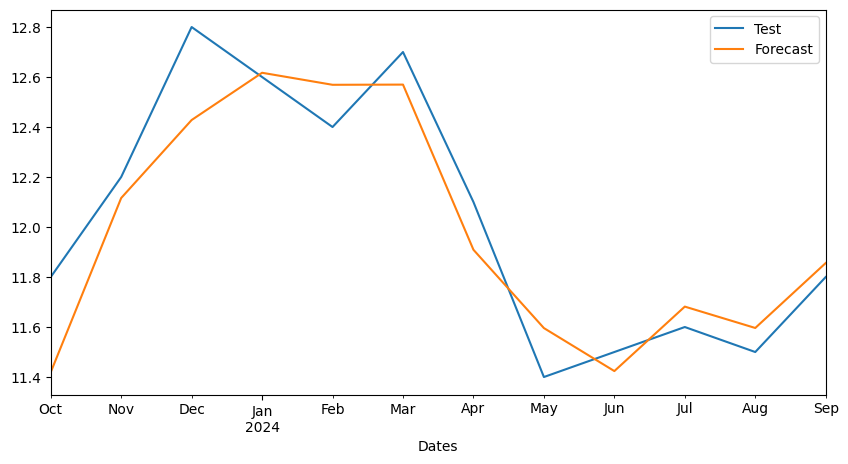

In [36]:
gas_test['Prices'].plot(legend=True, label = 'Test', figsize=(10,5))
forecast.plot(legend = True, label = 'Forecast')

Evaluate the model based on MAE and MSE

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(gas_test["Prices"],forecast)}')
print(f'Mean Squared Error = {mean_squared_error(gas_test["Prices"],forecast)}')

Mean Absolute Error = 0.1541741054132085
Mean Squared Error = 0.036340753018521965


### Forecasting values 12 months ahead

In [38]:
df = pd.read_csv('nat_gas.csv', parse_dates=['Dates'])
model = ExponentialSmoothing(df['Prices'], trend='add', seasonal='mul',seasonal_periods=12).fit()
forecast_val = model.forecast(12)



C:\Users\akarte\AppData\Local\Temp\ipykernel_22476\2694449206.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('nat_gas.csv', parse_dates=['Dates'])


In [39]:
date_index = pd.date_range('10/31/2024', periods=12, freq='M')
forecast = pd.DataFrame({'dates': date_index,
                         'prices':forecast_val})
forecast = forecast.set_index('dates')

<Axes: xlabel='Dates'>

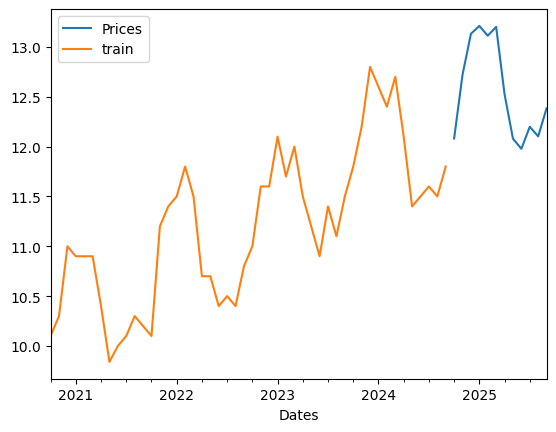

In [48]:
forecast.plot(legend=True,label = 'Forecast' )
gas['Prices'].plot( legend=True ,label = 'train')

The predictions looks consistent with the previous trend and seasonality. Kindly note that the gap is not missing data. Its only because we have not connected the last point from training dataset with the first point from test dataset. Following graph I have fixed it and we can see a continuous graph without any gaps

C:\Users\akarte\AppData\Local\Temp\ipykernel_22476\3782834232.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('nat_gas.csv', parse_dates=['Dates'])
c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Dates'>

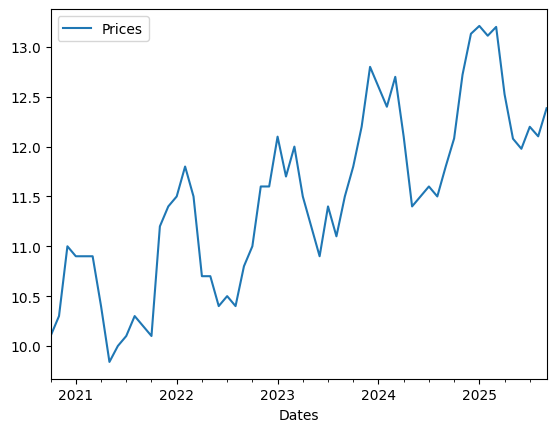

In [41]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_csv('nat_gas.csv', parse_dates=['Dates'])
df = df.set_index('Dates')
model = ExponentialSmoothing(df['Prices'], trend='add', seasonal='mul',seasonal_periods=12).fit()
forecast_val = model.forecast(12)
date_index = pd.date_range('10/31/2024', periods=12, freq='M')
forecast = pd.DataFrame({'Dates': date_index,
                         'Prices':forecast_val})
forecast = forecast.set_index('Dates')
df = pd.concat([df,forecast])

df.plot()

## Scope for Improvement
Our forecast only has month end data points. Our data and forecast would be more useful for traders if we could give them data on daily frequency. To achieve this we can fit a sin curve on our data. I'll leave this task for the readers. 

Hope you enjoyed this article :)